In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist 

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [3]:
# number of labels
num_labels = len(np.unique(y_train))

In [4]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# image dimension
image_size = x_train.shape[1]


In [10]:
#resize and normalize
x_train = np.reshape(x_train,[-1,image_size,image_size,1])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,[-1,image_size,image_size,1])
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
# network parameters
input_shape = (image_size,image_size,1)
batch_size = 128
kernel_size = (3,3)
pool_size = 2
filters = 64
dropout = 0.3

In [12]:
# Use functional API to build model

inputs = Input(shape = input_shape)

In [13]:
y = Conv2D(filters = filters, kernel_size = kernel_size, activation = 'relu')(inputs)

In [14]:
y = MaxPooling2D(pool_size)(y)

In [15]:
y = Conv2D(filters = filters, kernel_size = kernel_size, activation = 'relu')(y)

In [16]:
y = MaxPooling2D(pool_size)(y)

In [17]:
y = Conv2D(filters = filters, kernel_size = kernel_size, activation = 'relu')(y)

In [18]:
y = Flatten()(y)

In [19]:
y = Dropout(dropout)(y)

In [20]:
outputs = Dense(num_labels, activation='softmax')(y)

In [21]:
model = Model(inputs = inputs, outputs = outputs)

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)              

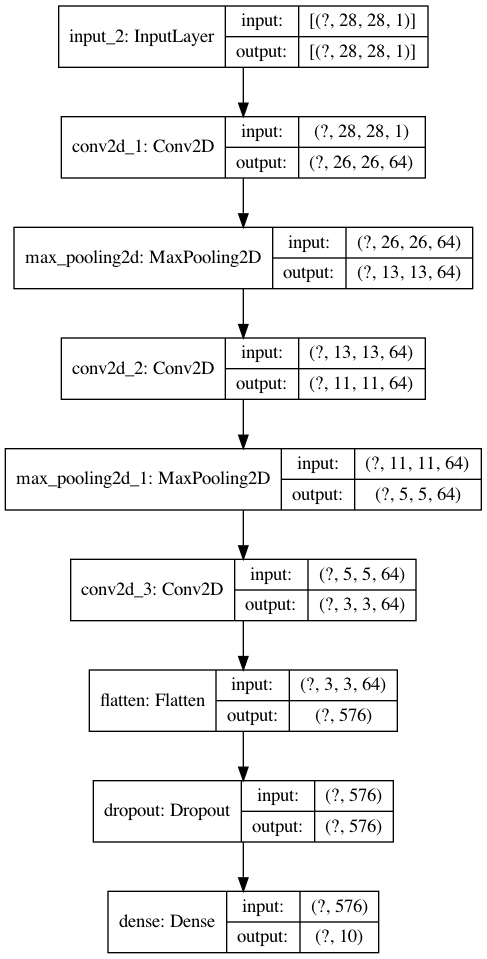

In [24]:
plot_model(model,to_file='cnn-mnist.png',show_shapes = True)

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 20,batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 60s 129ms/step - loss: 1.2440 - accuracy: 0.5770
Epoch 2/10
469/469 [==============================] - 58s 125ms/step - loss: 0.3959 - accuracy: 0.8789
Epoch 3/10
469/469 [==============================] - 60s 128ms/step - loss: 0.2657 - accuracy: 0.9187
Epoch 4/10
469/469 [==============================] - 59s 127ms/step - loss: 0.2017 - accuracy: 0.9379
Epoch 5/10
469/469 [==============================] - 59s 127ms/step - loss: 0.1654 - accuracy: 0.9484
Epoch 6/10
469/469 [==============================] - 58s 123ms/step - loss: 0.1427 - accuracy: 0.9567
Epoch 7/10
469/469 [==============================] - 63s 135ms/step - loss: 0.1286 - accuracy: 0.9603
Epoch 8/10
469/469 [==============================] - 55s 117ms/step - loss: 0.1186 - accuracy: 0.9635
Epoch 9/10
469/469 [==============================] - 55s 118ms/step - loss: 0.1090 - accuracy: 0.9665
Epoch 10/10
469/469 [==============================] - 54s 115ms/step - l

In [27]:
_ , acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)

79/79 [==============================] - 2s 24ms/step - loss: 0.0645 - accuracy: 0.9787


In [28]:
print("Test Accuracy: %.1f%%" %(100*acc))

Test Accuracy: 97.9%
